In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
100% 583M/586M [00:11<00:00, 60.0MB/s]
100% 586M/586M [00:11<00:00, 51.9MB/s]


In [ ]:
!unzip animals10.zip -d animals10_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: animals10_dataset/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: animals10_dataset/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: animals10_dat

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/animals10_dataset/raw-img'):
    print(f"Se encontraron {len(dirnames)} directorios y {len(filenames)} imágenes en {dirpath}")

Found 10 directories and 0 images in /content/animals10_dataset/raw-img
Found 0 directories and 4821 images in /content/animals10_dataset/raw-img/ragno
Found 0 directories and 2623 images in /content/animals10_dataset/raw-img/cavallo
Found 0 directories and 1862 images in /content/animals10_dataset/raw-img/scoiattolo
Found 0 directories and 1668 images in /content/animals10_dataset/raw-img/gatto
Found 0 directories and 2112 images in /content/animals10_dataset/raw-img/farfalla
Found 0 directories and 1820 images in /content/animals10_dataset/raw-img/pecora
Found 0 directories and 1446 images in /content/animals10_dataset/raw-img/elefante
Found 0 directories and 3098 images in /content/animals10_dataset/raw-img/gallina
Found 0 directories and 1866 images in /content/animals10_dataset/raw-img/mucca
Found 0 directories and 4863 images in /content/animals10_dataset/raw-img/cane


In [ ]:
animals = sorted([animal for animal in os.listdir('/content/animals10_dataset/raw-img')])
print(animals)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [ ]:
translate = {'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'ragno': 'spider',
 'dog': 'cane',
 'elephant': 'elefante',
 'butterfly': 'farfalla',
 'chicken': 'gallina',
 'cat': 'gatto',
 'cow': 'mucca',
 'sheep': 'pecora',
 'spider': 'ragno',
 'squirrel': 'scoiattolo',
 'horse': 'cavallo'}

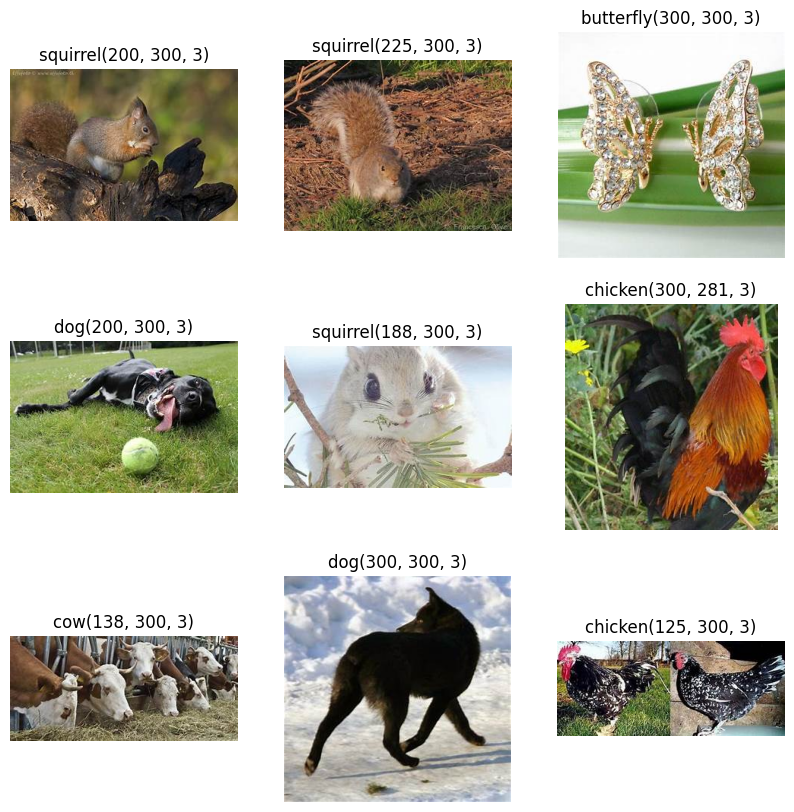

In [ ]:
import random
import matplotlib.pyplot as plt
def view_random_images():
    plt.figure(figsize=(10, 10))
    for i in range(0, 9):
        ax = plt.subplot(3, 3, i+1)
        random_number = random.randint(0, 9)
        image_path = os.path.join('/content/animals10_dataset/raw-img', animals[random_number])
        image_path = os.path.join(image_path, random.sample(os.listdir(image_path), 1)[0])
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(translate[animals[random_number]] + str(image.shape))
        plt.axis('off')

view_random_images()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (150, 150)  # Redimensionar las imágenes a 150x150
batch_size = 100  # Tamaño del lote
num_classes = 10  # Número de clases

# Preparar el generador de datos con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Escalar las imágenes entre 0 y 1
    shear_range=0.2,  # Aplicar un corte aleatorio
    zoom_range=0.2,  # Aplicar un zoom aleatorio
    horizontal_flip=True,  # Voltear las imágenes horizontalmente
    validation_split=0.2  # Usar el 20% de los datos para validación
)


In [ ]:
from tensorflow.keras.applications import VGG16
# Generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    '/content/animals10_dataset/raw-img',  # Ruta de imágenes
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Generador de datos de validación
validation_generator = train_datagen.flow_from_directory(
    '/content/animals10_dataset/raw-img',  # Ruta de imágenes
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


from tensorflow.keras.layers import BatchNormalization
# Construir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar callbacks
model_checkpoint = ModelCheckpoint(
    'model2.2.2.keras',  # Nombre del archivo para guardar el mejor modelo
    monitor='val_loss',  # Monitorizar la pérdida de validación
    save_best_only=True,  # Guardar solo el mejor modelo
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorizar la pérdida de validación
    patience=5,  # Esperar 5 épocas antes de detener el entrenamiento
    mode='min',  # Detener cuando la pérdida deja de mejorar
    restore_best_weights=True  # Restaurar los mejores pesos al final
)




In [ ]:

# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[model_checkpoint, early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 182s 780ms/step - accuracy: 0.2934 - loss: 2.4786 - val_accuracy: 0.1843 - val_loss: 3.9503
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 177s 715ms/step - accuracy: 0.4719 - loss: 1.5562 - val_accuracy: 0.3024 - val_loss: 2.2305
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 204s 721ms/step - accuracy: 0.5481 - loss: 1.3530 - val_accuracy: 0.5556 - val_loss: 1.3168
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 200s 713ms/step - accuracy: 0.5796 - loss: 1.2499 - val_accuracy: 0.6206 - val_loss: 1.0983
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 202s 721ms/step - accuracy: 0.6058 - loss: 1.1515 - val_accuracy: 0.6403 - val_loss: 1.0649
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 154s 716ms/step - accuracy: 0.6397 - loss: 1.0538 - val_accuracy: 0.6596 - val_loss: 1.0021
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 155s 724ms/step - accuracy: 0.6576 - loss: 1.0093 - val_accuracy: 0.6606 - val_loss: 1.0021
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 201s 720ms/step - accuracy: 0.6716 - loss: 0.96

Saving caba.jpeg to caba.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


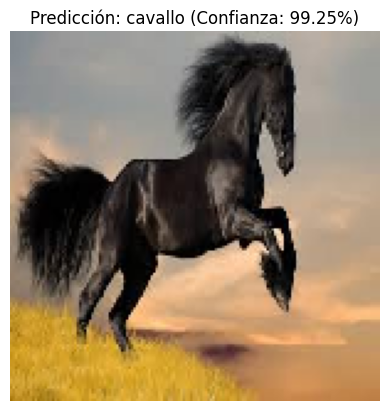

La clase predicha es: cavallo con una confianza de 99.25%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image



def predict_image():

    uploaded = files.upload()

    model = tf.keras.models.load_model('model2.2.2.keras')  # Cargar el mejor modelo

    for fn in uploaded.keys():

        img_path = fn
        img = image.load_img(img_path, target_size=(150, 150))  # Redimensionar la imagen
        img_array = image.img_to_array(img)  # Convertir a array de píxeles
        img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
        img_array /= 255.0  # Escalar los valores de píxeles a [0,1]

        predictions = model.predict(img_array)


        class_names = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
        predicted_class_index = np.argmax(predictions)
        predicted_class = class_names[predicted_class_index]
        confidence = np.max(predictions) * 100

        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicción: {predicted_class} (Confianza: {confidence:.2f}%)')
        plt.show()

        print(f'La clase predicha es: {predicted_class} con una confianza de {confidence:.2f}%')


predict_image()
